데이터 샘플:
         Time Destination  Previous_LifeTime  New_LifeTime Previous_NextHop  \
0  30.004086    10.0.0.9          32.019288     35.524086         10.0.0.9   
1  30.004086    10.0.0.9          32.019288     35.524086         10.0.0.9   
2  30.004086    10.0.0.9          32.004086     35.524086         10.0.0.9   
3  30.004086    10.0.0.9          32.004086     35.524086         10.0.0.9   
4  30.322368    10.0.0.9          35.524086     33.103111         10.0.0.9   

  New_NextHop  Previous_HopCount  New_HopCount  
0    10.0.0.9                  1             1  
1    10.0.0.9                  1             1  
2    10.0.0.9                  1             1  
3    10.0.0.9                  1             1  
4    10.0.0.9                  1             1  


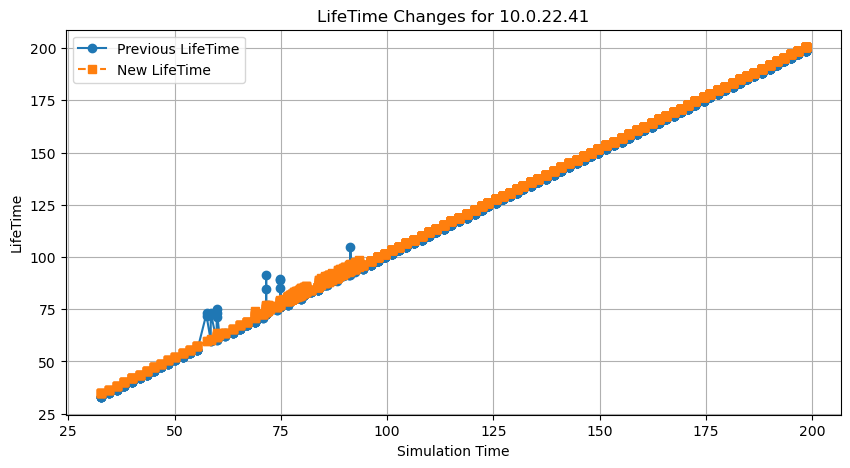

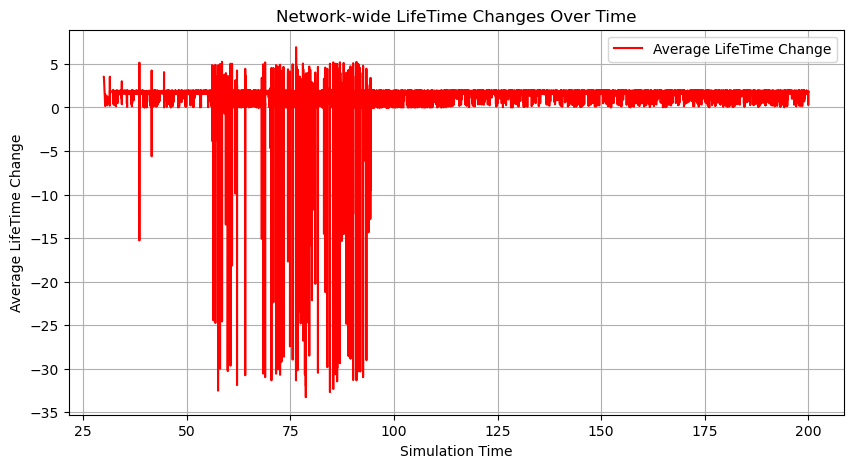

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "aodv_routing_log.csv"
df = pd.read_csv(file_path)

print("데이터 샘플:\n", df.head())

df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Previous_LifeTime'] = pd.to_numeric(df['Previous_LifeTime'], errors='coerce')
df['New_LifeTime'] = pd.to_numeric(df['New_LifeTime'], errors='coerce')

destination = "10.0.22.41"
df_filtered = df[df['Destination'] == destination]

plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Time'], df_filtered['Previous_LifeTime'], label='Previous LifeTime', marker='o')
plt.plot(df_filtered['Time'], df_filtered['New_LifeTime'], label='New LifeTime', marker='s', linestyle='--')
plt.xlabel('Simulation Time')
plt.ylabel('LifeTime')
plt.title(f'LifeTime Changes for {destination}')
plt.legend()
plt.grid()
plt.show()

df['LifeTime_Change'] = df['New_LifeTime'] - df['Previous_LifeTime']
df_avg = df.groupby('Time')['LifeTime_Change'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_avg.index, df_avg.values, label='Average LifeTime Change', color='red')
plt.xlabel('Simulation Time')
plt.ylabel('Average LifeTime Change')
plt.title('Network-wide LifeTime Changes Over Time')
plt.legend()
plt.grid()
plt.show()


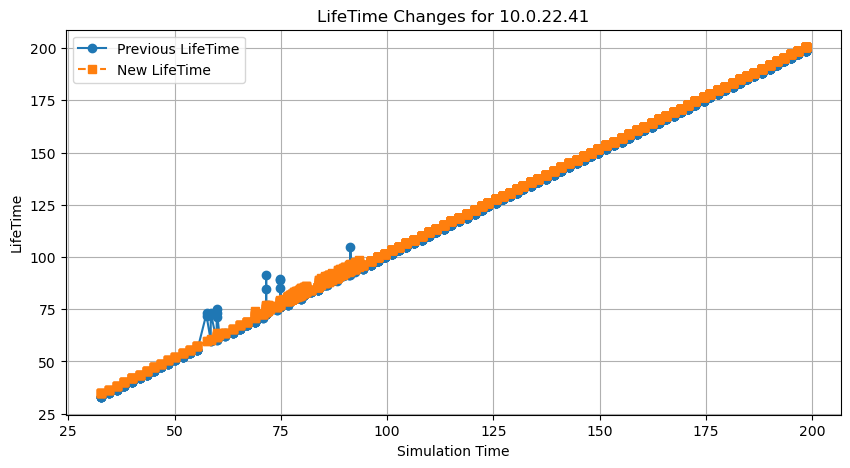

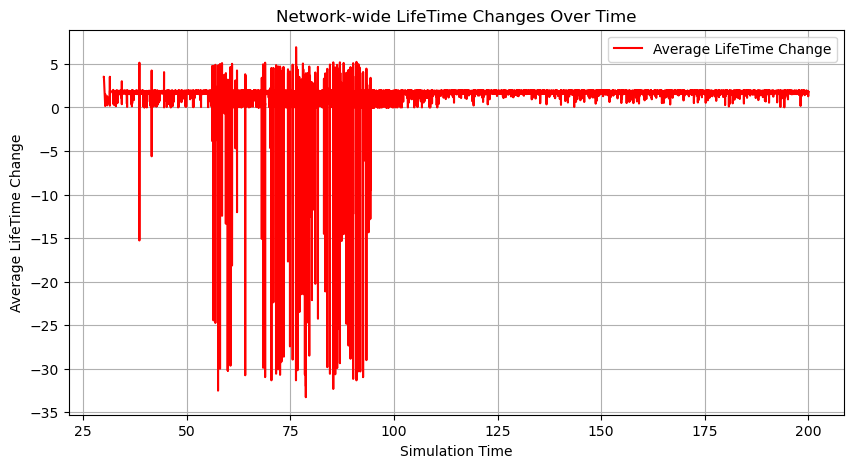

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re  # 정규 표현식 사용

# 🔹 데이터 로드
file_path = "aodv_routing_log.csv"
df = pd.read_csv(file_path)

# 🔹 데이터 타입 변환
df['Time'] = pd.to_numeric(df['Time'])
df['Previous_LifeTime'] = pd.to_numeric(df['Previous_LifeTime'])
df['New_LifeTime'] = pd.to_numeric(df['New_LifeTime'])

# 🔹 Node 번호만 추출 (예: "Node[3]" → "3")
df['Node'] = df['Node'].apply(lambda x: int(re.search(r'\[(\d+)\]', x).group(1)) if pd.notna(x) else -1)

# 🔹 특정 목적지의 LifeTime 변화 분석
destination = "10.0.22.41"
df_filtered = df[df['Destination'] == destination]

plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Time'], df_filtered['Previous_LifeTime'], label='Previous LifeTime', marker='o')
plt.plot(df_filtered['Time'], df_filtered['New_LifeTime'], label='New LifeTime', linestyle='--', marker='s')
plt.xlabel('Simulation Time')
plt.ylabel('LifeTime')
plt.title(f'LifeTime Changes for {destination}')
plt.legend()
plt.grid()
plt.show()

# 🔹 네트워크 전체 LifeTime 변화 분석
df['LifeTime_Change'] = df['New_LifeTime'] - df['Previous_LifeTime']
df_avg = df.groupby('Time')['LifeTime_Change'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_avg.index, df_avg.values, label='Average LifeTime Change', color='red')
plt.xlabel('Simulation Time')
plt.ylabel('Average LifeTime Change')
plt.title('Network-wide LifeTime Changes Over Time')
plt.legend()
plt.grid()
plt.show()



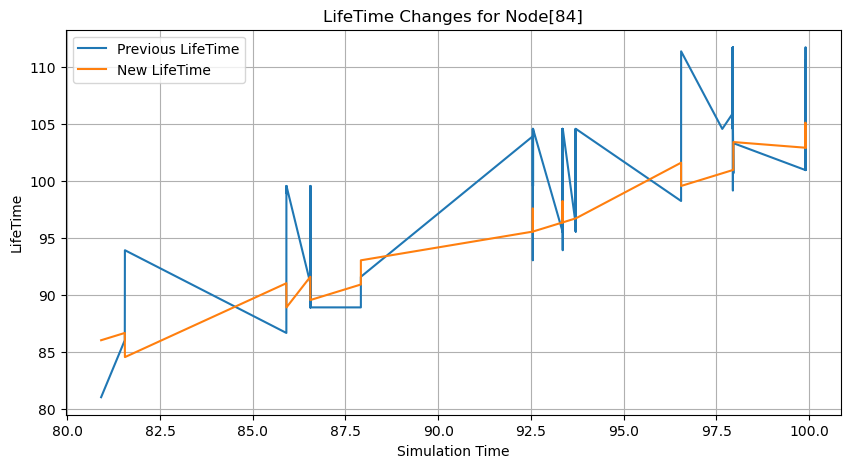

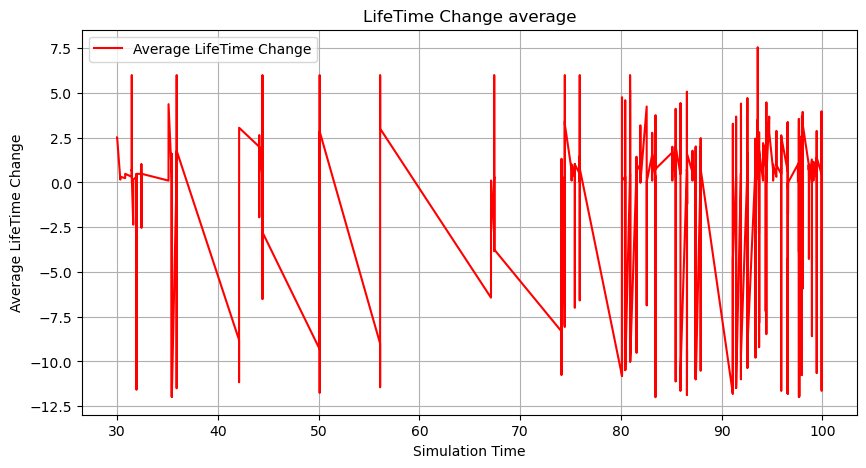

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re

file_path = "aodv_routing_log_l.csv"
df = pd.read_csv(file_path)

df['Node'] = df['Node'].apply(lambda x: int(re.search(r'\[(\d+)\]', x).group(1)) if pd.notna(x) else -1)

node_id = 84
df_filtered = df[df['Node'] == node_id]

plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Time'], df_filtered['Previous_LifeTime'], label='Previous LifeTime')
plt.plot(df_filtered['Time'], df_filtered['New_LifeTime'], label='New LifeTime', linestyle='-')
plt.xlabel('Simulation Time')
plt.ylabel('LifeTime')
plt.title(f'LifeTime Changes for Node[{node_id}]')
plt.legend()
plt.grid()
plt.show()


df['LifeTime_Change'] = df['New_LifeTime'] - df['Previous_LifeTime']
df_avg = df.groupby('Time')['LifeTime_Change'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_avg.index, df_avg.values, label='Average LifeTime Change', color='red')
plt.xlabel('Simulation Time')
plt.ylabel('Average LifeTime Change')
plt.title('LifeTime Change average')
plt.legend()
plt.grid()
plt.show()

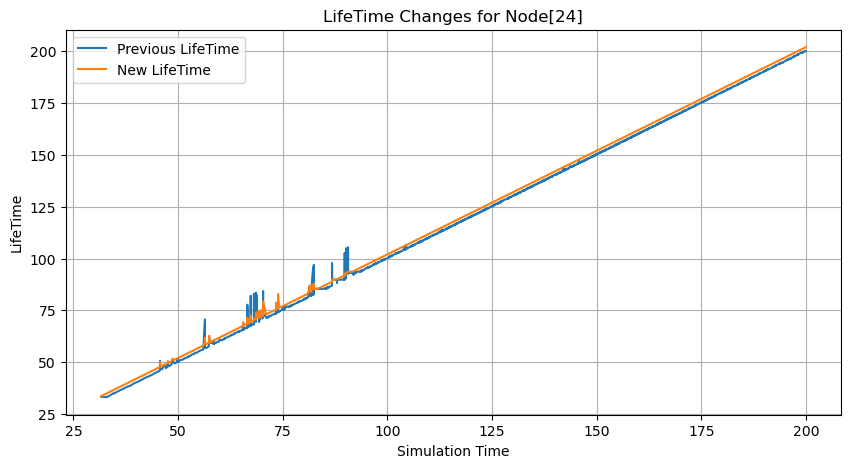

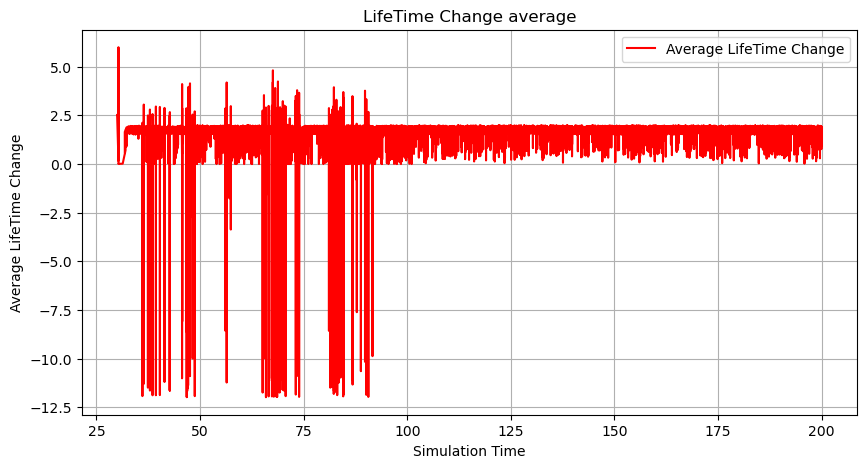

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

file_path = "aodv_routing_log.csv"
df = pd.read_csv(file_path)

df['Node'] = df['Node'].apply(lambda x: int(re.search(r'\[(\d+)\]', x).group(1)) if pd.notna(x) else -1)

node_id = 24
df_filtered = df[df['Node'] == node_id]

plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Time'], df_filtered['Previous_LifeTime'], label='Previous LifeTime')
plt.plot(df_filtered['Time'], df_filtered['New_LifeTime'], label='New LifeTime', linestyle='-')
plt.xlabel('Simulation Time')
plt.ylabel('LifeTime')
plt.title(f'LifeTime Changes for Node[{node_id}]')
plt.legend()
plt.grid()
plt.show()


df['LifeTime_Change'] = df['New_LifeTime'] - df['Previous_LifeTime']
df_avg = df.groupby('Time')['LifeTime_Change'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_avg.index, df_avg.values, label='Average LifeTime Change', color='red')
plt.xlabel('Simulation Time')
plt.ylabel('Average LifeTime Change')
plt.title('LifeTime Change average')
plt.legend()
plt.grid()
plt.show()

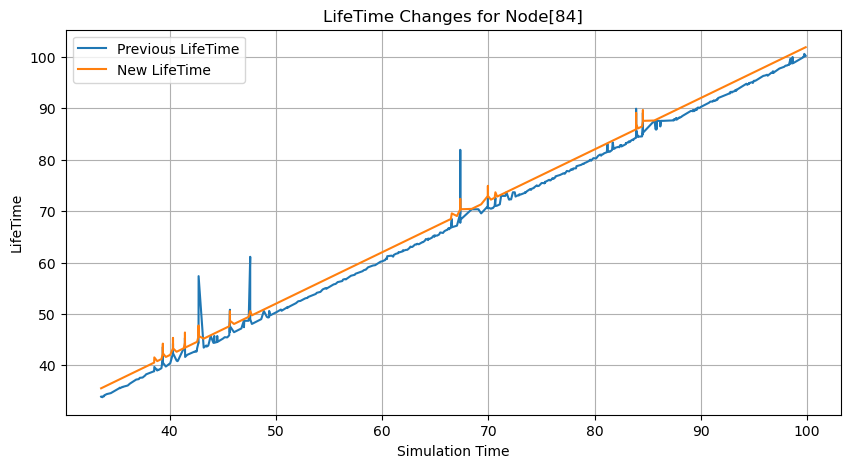

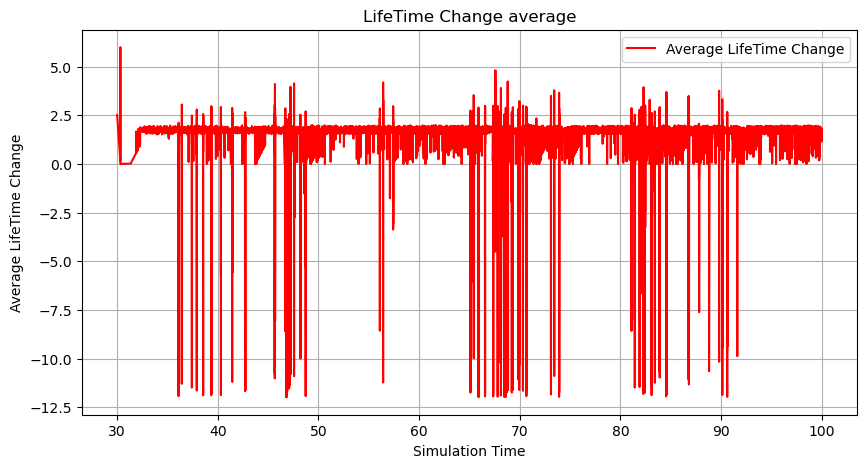

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

file_path = "aodv_routing_log_b.csv"
df = pd.read_csv(file_path)

df['Node'] = df['Node'].apply(lambda x: int(re.search(r'\[(\d+)\]', x).group(1)) if pd.notna(x) else -1)

node_id = 84
df_filtered = df[(df['Node'] == node_id) & (df['Time'] <= 100)]  # 100초 이하 데이터만 선택

plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Time'], df_filtered['Previous_LifeTime'], label='Previous LifeTime')
plt.plot(df_filtered['Time'], df_filtered['New_LifeTime'], label='New LifeTime', linestyle='-')
plt.xlabel('Simulation Time')
plt.ylabel('LifeTime')
plt.title(f'LifeTime Changes for Node[{node_id}]')
plt.legend()
plt.grid()
plt.show()

df['LifeTime_Change'] = df['New_LifeTime'] - df['Previous_LifeTime']
df_avg = df.groupby('Time')['LifeTime_Change'].mean()
df_avg = df_avg[df_avg.index <= 100]  # 100초 이하 데이터만 선택

plt.figure(figsize=(10, 5))
plt.plot(df_avg.index, df_avg.values, label='Average LifeTime Change', color='red')
plt.xlabel('Simulation Time')
plt.ylabel('Average LifeTime Change')
plt.title('LifeTime Change average')
plt.legend()
plt.grid()
plt.show()


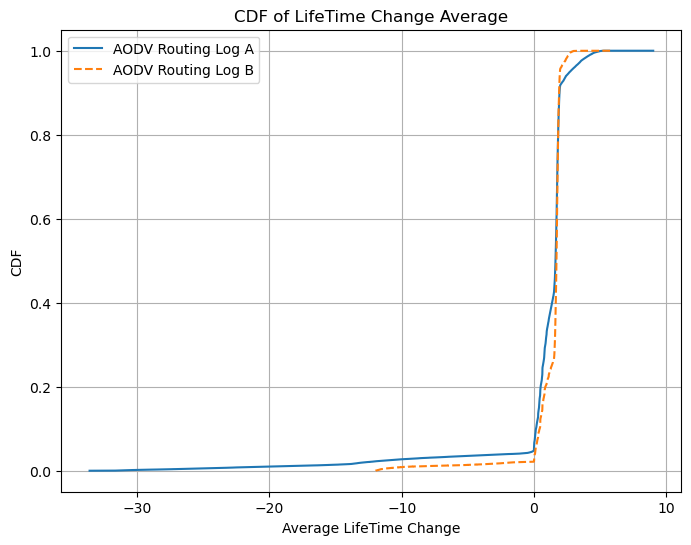

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 데이터 로드
file1 = "aodv_routing_log.csv"
file2 = "aodv_routing_log_b.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Node ID 추출
df1['Node'] = df1['Node'].apply(lambda x: int(re.search(r'\[(\d+)\]', x).group(1)) if pd.notna(x) else -1)
df2['Node'] = df2['Node'].apply(lambda x: int(re.search(r'\[(\d+)\]', x).group(1)) if pd.notna(x) else -1)

# LifeTime 변화량 계산
df1['LifeTime_Change'] = df1['New_LifeTime'] - df1['Previous_LifeTime']
df2['LifeTime_Change'] = df2['New_LifeTime'] - df2['Previous_LifeTime']

# 100초 이하 데이터만 선택
df_avg1 = df1.groupby('Time')['LifeTime_Change'].mean()
df_avg2 = df2.groupby('Time')['LifeTime_Change'].mean()

df_avg1 = df_avg1[df_avg1.index <= 100]
df_avg2 = df_avg2[df_avg2.index <= 100]

# CDF 계산
lifetime_changes1_sorted = np.sort(df_avg1.values)
lifetime_changes2_sorted = np.sort(df_avg2.values)

cdf1 = np.arange(1, len(lifetime_changes1_sorted) + 1) / len(lifetime_changes1_sorted)
cdf2 = np.arange(1, len(lifetime_changes2_sorted) + 1) / len(lifetime_changes2_sorted)

# CDF 플롯
plt.figure(figsize=(8, 6))
plt.plot(lifetime_changes1_sorted, cdf1, label="AODV Routing Log A", linestyle='-')
plt.plot(lifetime_changes2_sorted, cdf2, label="AODV Routing Log B", linestyle='--')

plt.xlabel("Average LifeTime Change")
plt.ylabel("CDF")
plt.title("CDF of LifeTime Change Average")
plt.legend()
plt.grid()
plt.show()
